In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

In [2]:
def download_dados(tickers, interval = '1d', period = 'max'):
    
    df = yf.download(tickers, interval=interval, period=period)['Adj Close']
    #retorno, df_ln = coin.calc_ret_ln(df)

    return df

In [3]:
tickers = "ABEV3.SA AZUL4.SA B3SA3.SA BBAS3.SA BBDC3.SA BBDC4.SA BBSE3.SA  BRAP4.SA  BRFS3.SA BRKM5.SA BRML3.SA CCRO3.SA CIEL3.SA CMIG4.SA COGN3.SA CRFB3.SA CSAN3.SA CSNA3.SA CVCB3.SA CYRE3.SA ECOR3.SA EGIE3.SA ELET3.SA ELET6.SA EMBR3.SA ENBR3.SA EQTL3.SA FLRY3.SA GGBR4.SA GNDI3.SA GOAU4.SA GOLL4.SA HAPV3.SA HGTX3.SA HYPE3.SA IGTA3.SA IRBR3.SA ITSA4.SA ITUB4.SA JBSS3.SA KLBN11.SA LAME4.SA LREN3.SA MGLU3.SA MRFG3.SA MRVE3.SA MULT3.SA PETR3.SA PETR4.SA QUAL3.SA RADL3.SA RAIL3.SA RENT3.SA SANB11.SA SBSP3.SA SULA11.SA SUZB3.SA TAEE11.SA TOTS3.SA UGPA3.SA USIM5.SA VALE3.SA VIIA3.SA WEGE3.SA YDUQ3.SA"

In [4]:
from mlpairs import OpticsPairs
import pandas as pd

stock_prices = yf.download(tickers, interval='1d', period='5y')['Adj Close']
train = stock_prices[:'2019']
test = stock_prices['2020':]

train.head()

[*********************100%***********************]  65 of 65 completed


,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BRAP4.SA,BRFS3.SA,BRKM5.SA,...,SULA11.SA,SUZB3.SA,TAEE11.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIIA3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2016-11-03,15.713830,NaN,4.969853,20.966413,14.154943,16.188732,20.307777,8.594766,51.959999,22.450506,...,12.333261,19.289434,12.568616,8.766671,32.827068,3.627925,15.969096,3.542468,6.009517,13.873507
2016-11-04,15.555812,NaN,4.933393,21.179150,14.080191,16.188732,20.137411,8.506580,51.150002,22.070704,...,12.644979,NaN,12.672791,8.135973,32.545700,3.519087,15.714581,3.661877,6.052289,13.730152
2016-11-07,15.792837,NaN,5.205444,22.321627,14.547357,16.751017,20.975618,9.123883,52.869999,23.142591,...,12.638202,NaN,12.807611,8.151742,32.827068,3.836530,16.819906,3.920597,6.134268,14.415066
2016-11-08,15.854288,NaN,5.160570,22.282228,14.654802,16.740791,20.784803,9.429145,53.830002,23.395790,...,12.739849,NaN,12.807611,8.057138,32.873966,3.863740,17.430750,4.119611,6.059418,14.343388
2016-11-09,15.740168,NaN,5.039970,21.494316,14.346483,16.280741,20.566732,9.775105,53.200001,23.091949,...,12.563661,NaN,12.439926,7.940459,31.912601,3.881880,18.179756,4.099710,5.959614,14.000933


In [5]:
train.dropna(inplace=True)
test.dropna(inplace=True)
print(len(train), len(test))

410 423


C:\Users\maike\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [6]:
op = OpticsPairs(train)
op.returns.head()

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BRAP4.SA,BRFS3.SA,BRKM5.SA,...,SULA11.SA,SUZB3.SA,TAEE11.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIIA3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2018-04-27,-0.005577,0.030859,0.006233,0.000000,0.002465,0.010942,0.005382,-0.007351,-0.009626,0.011881,...,-0.004987,0.011109,0.018164,0.001249,0.006823,-0.026340,-0.007187,0.028747,0.000558,-0.051108
2018-04-30,0.006471,0.027958,-0.020519,-0.017403,-0.019366,-0.015380,-0.019272,0.010945,-0.035770,-0.007393,...,-0.015034,0.020124,-0.000469,-0.001871,-0.024685,0.016791,0.006618,-0.022892,-0.008366,-0.006849
2018-05-02,-0.028290,-0.024451,-0.027273,-0.018528,-0.015987,-0.025745,0.000000,-0.003937,-0.008064,-0.001697,...,-0.006013,0.033853,-0.002818,-0.026563,-0.005459,-0.006422,0.000822,-0.001233,0.012936,-0.027900
2018-05-03,-0.003088,-0.048719,-0.018285,-0.028318,-0.011882,-0.020579,-0.001456,0.007905,-0.012195,-0.025864,...,0.003257,-0.038398,-0.010474,-0.000321,-0.101630,-0.022161,0.007801,-0.060494,-0.022765,-0.000323
2018-05-04,-0.004425,-0.008881,-0.004967,-0.002000,-0.003548,0.000910,-0.013848,0.014286,0.004115,0.027490,...,-0.086271,-0.023763,-0.017031,0.000321,-0.000185,0.036827,0.012426,-0.006570,-0.022727,0.006452


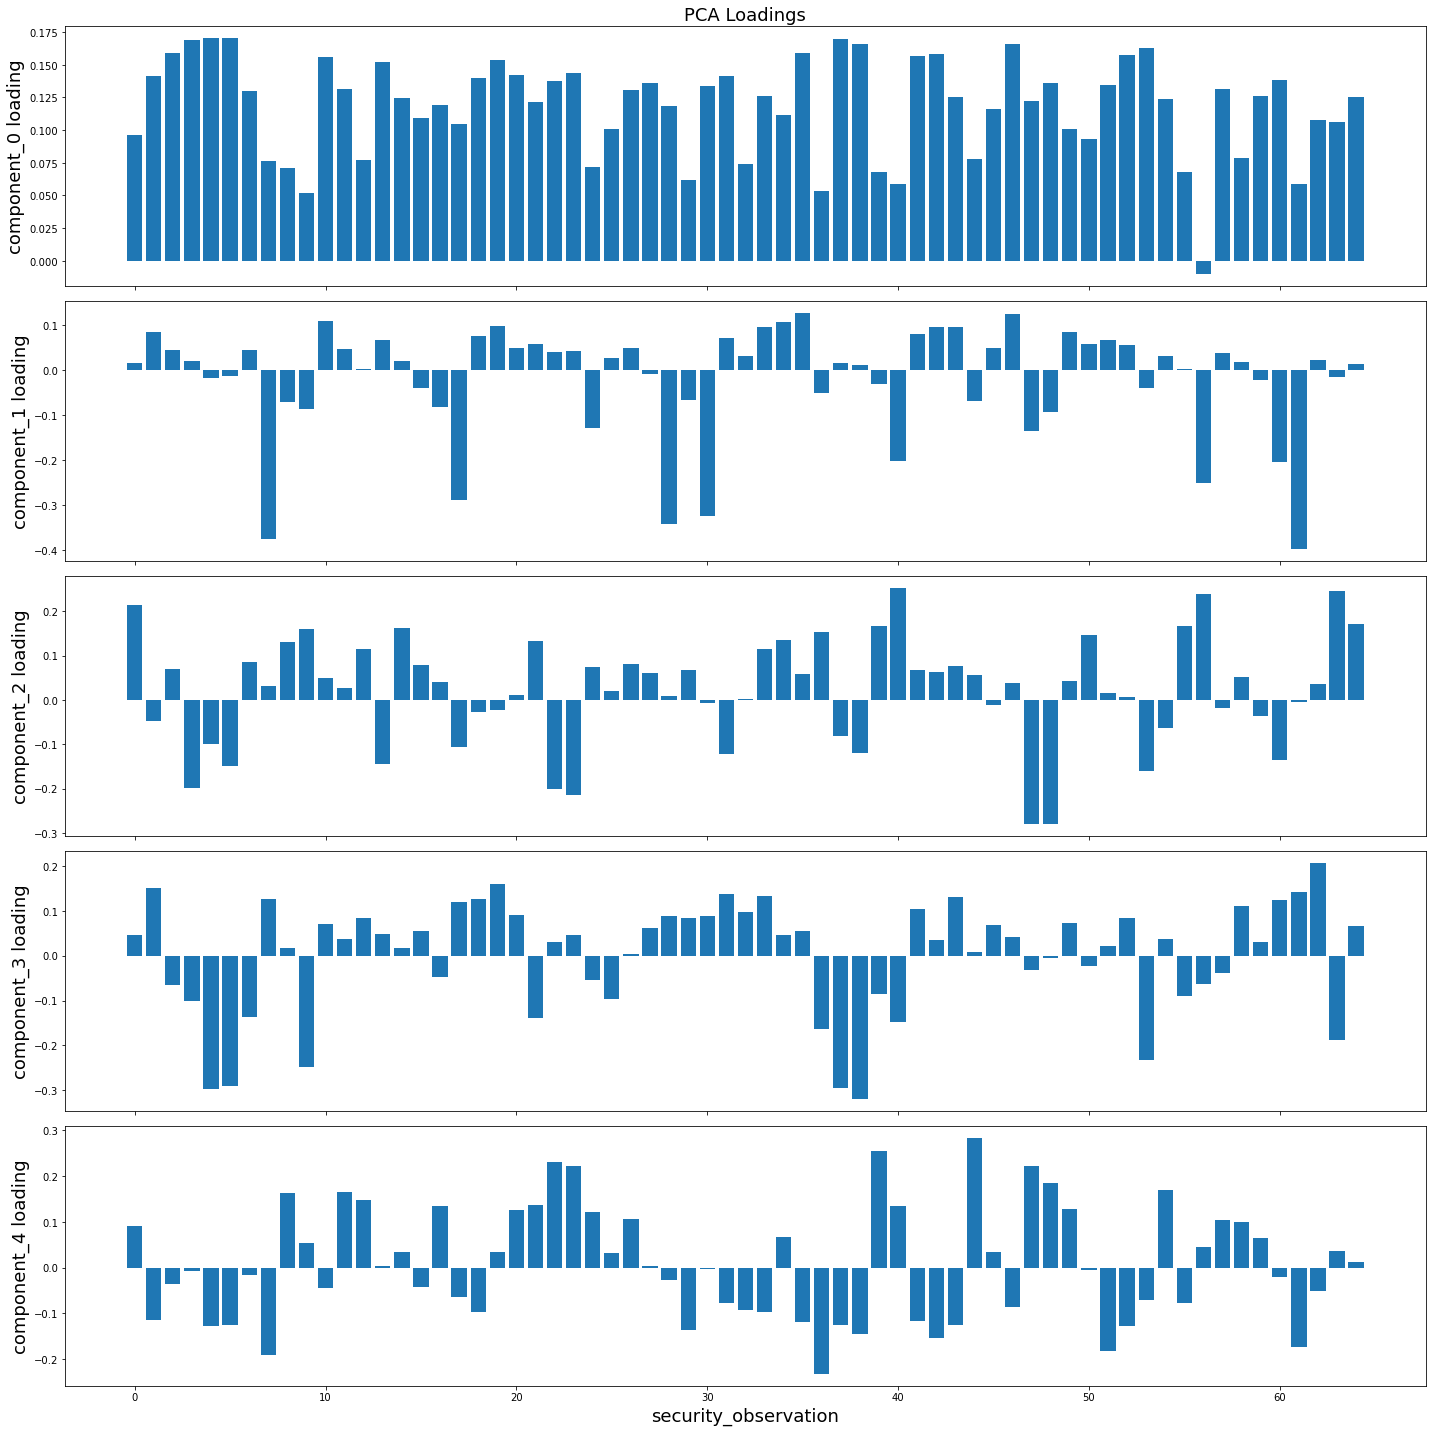

In [7]:
op.find_pairs()
op.pairs

Total variance explained: 57.99999999999999%


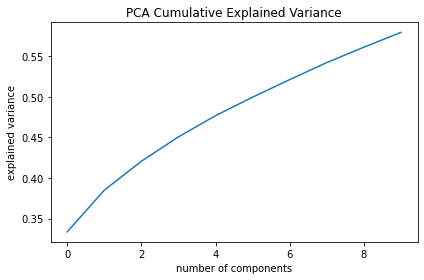

In [8]:
op.plot_clusters(n_dimensions=2)

In [10]:
op.calc_eg_norm_spreads()
op.calc_hurst_exponents()
op.calc_half_lives()
op.calc_avg_cross_count()

Found 76 potential pairs


0      (B3SA3.SA, BRML3.SA)
1      (B3SA3.SA, CVCB3.SA)
2      (B3SA3.SA, CYRE3.SA)
3      (B3SA3.SA, HGTX3.SA)
4      (B3SA3.SA, IGTA3.SA)
              ...          
71     (BBDC4.SA, ITUB4.SA)
72    (BBDC4.SA, SANB11.SA)
73     (ITSA4.SA, ITUB4.SA)
74    (ITSA4.SA, SANB11.SA)
75    (ITUB4.SA, SANB11.SA)
Length: 76, dtype: object

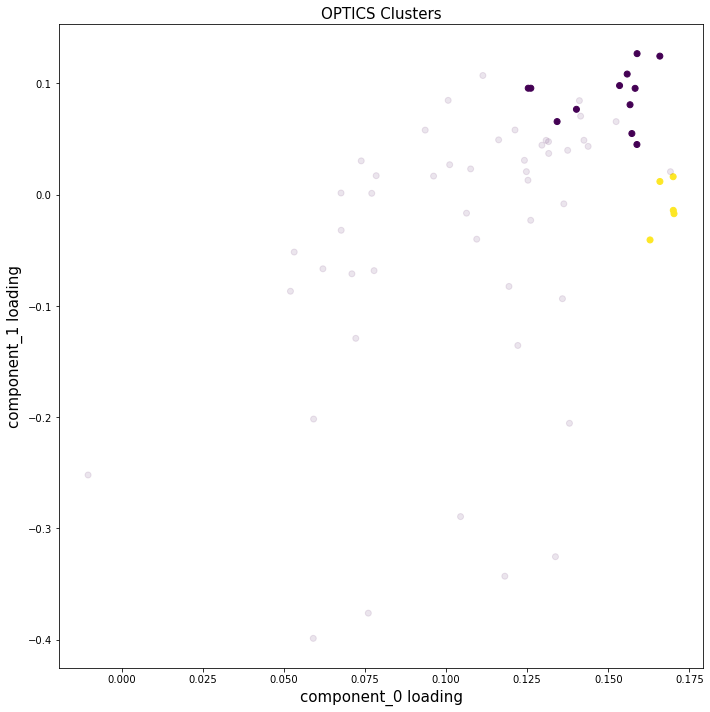

In [11]:
op.filter_pairs()
op.filtered_pairs

ValueError: Required: 
 1. prices 
 2.                                 engle_granger_tests 
 3. hurst_exponents                                 
 4. half_lives 
 5. avg_cross_count